In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor

In [2]:
# reading historical file
diamonds = pd.read_csv(r"C:\Users\Vanessa\Downloads\Dados\Programas\Repositório Git\LinearRegression_Diamonds\LinearRegression_Diamonds\diamonds.csv")

In [3]:
# exploratory analysis of historical file
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [4]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
diamonds.describe(include = object)

,cut,color,clarity
count,48940,48940,48940
unique,5,7,8
top,Ideal,G,SI1
freq,19608,10287,11832


In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds.corr()

C:\Users\Vanessa\AppData\Local\Temp\ipykernel_21672\188364720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diamonds.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000


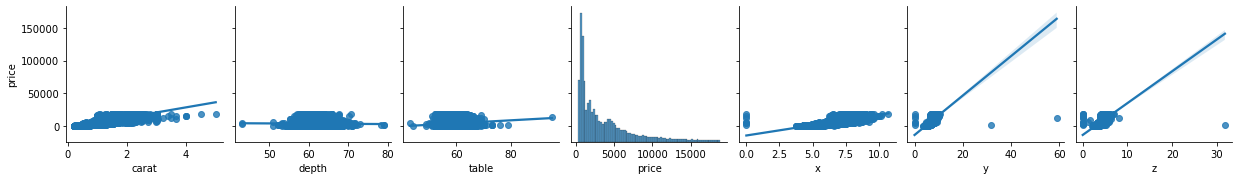

In [8]:
# ploting correlations
sns.pairplot(diamonds,kind='reg',y_vars='price')

In [9]:
# reading Rick's file
rick = pd.read_csv(r"C:\Users\Vanessa\Downloads\Dados\Programas\Repositório Git\LinearRegression_Diamonds\LinearRegression_Diamonds\rick_diamonds.csv")

In [10]:
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [11]:
rick.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [12]:
### Baseline model(mean) with "price_predicted" column in rick's dataset
rick['price_predicted'] =  diamonds['price'].mean()
rick.to_csv('rick_baseline.csv')
RMSE = 3980.713882502374

In [13]:
### Linear Regression 1

model = LinearRegression()
X = diamonds[['carat']]
y = diamonds['price']
model.fit(X,y)
reg1 = model.predict(rick[['carat']])
rick['price_predicted'] =  reg1
rick.to_csv('regression1.csv')
# RMSE = 1605.1517570736205

In [14]:
### Linear Regression 1 without outliers

model = RANSACRegressor()
X = diamonds[['carat']]
y = diamonds['price']
model.fit(X, y)
reg_out1 = model.predict(rick[['carat']])
reg_out1 = rick['price_predicted']
rick.to_csv('regout1.csv')
# RMSE = 1586.8

In [15]:
### Linear Regression 2

model = LinearRegression()
X = diamonds[['carat', 'x']]
y = diamonds['price']
model.fit(X,y)
reg2 = model.predict(rick[['carat', 'x']])
rick['price_predicted'] =  reg2
rick.to_csv('regression2.csv')
# RMSE = 1591.2431608972843

In [16]:
### Linear Regression 2 without outliers

model = RANSACRegressor(random_state = 100)
X = diamonds[['carat', 'x']]
y = diamonds['price']
model.fit(X, y)
reg_out2 = model.predict(rick[['carat', 'x']])
reg_out2 = rick['price_predicted']
rick.to_csv('regout2.csv')
# RMSE = 1586.85

In [17]:
### Linear Regression 3

model = LinearRegression()
X = diamonds[['carat', 'x', 'y']]
y = diamonds['price']
model.fit(X,y)
reg3 = model.predict(rick[['carat', 'x', 'y']])
rick['price_predicted'] =  reg3
rick.to_csv('regression3.csv')
# RMSE = 1590.4

In [18]:
### Linear Regression 3 without outliers

model = RANSACRegressor(random_state = 100)
X = diamonds[['carat', 'x', 'y']]
y = diamonds['price']
model.fit(X, y)
reg_out3 = model.predict(rick[['carat', 'x', 'y']])
reg_out3 = rick['price_predicted']
rick.to_csv('regout3.csv')
# RMSE = 1586.85

In [19]:
### Linear Regression 4

model = LinearRegression()
X = diamonds[['carat', 'x', 'y', 'z']]
y = diamonds['price']
model.fit(X,y)
reg4 = model.predict(rick[['carat', 'x', 'y', 'z']])
rick['price_predicted'] =  reg4
rick.to_csv('regression4.csv')
# RMSE = 1586.8

In [20]:
### Linear Regression 4 without outliers

model = RANSACRegressor(random_state = 200)
X = diamonds[['carat', 'x', 'y', 'z']]
y = diamonds['price']
model.fit(X, y)
reg_out4 = model.predict(rick[['carat', 'x', 'y', 'z']])
reg_out4 = rick['price_predicted']
rick.to_csv('regout4.csv')
# RMSE = 1586.85

<AxesSubplot:xlabel='carat', ylabel='price'>

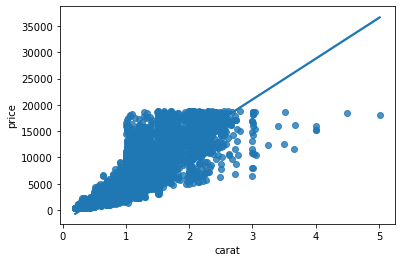

In [21]:
sns.regplot(x='carat', y='price', data = diamonds)

<AxesSubplot:xlabel='x', ylabel='price'>

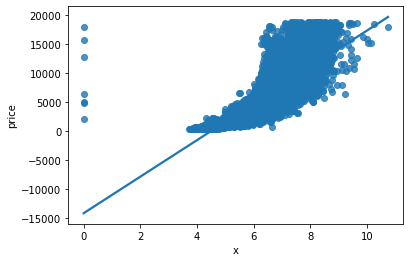

In [22]:
sns.regplot(x='x', y='price', data = diamonds)

<AxesSubplot:xlabel='y', ylabel='price'>

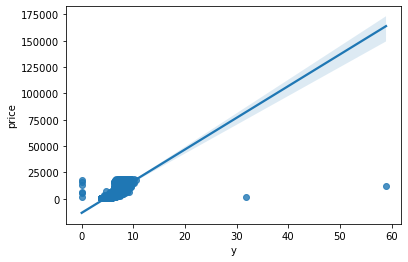

In [23]:
sns.regplot(x='y', y='price', data = diamonds)

<AxesSubplot:xlabel='z', ylabel='price'>

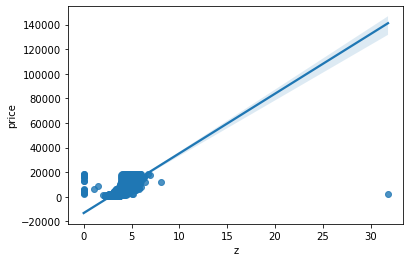

In [24]:
sns.regplot(x='z', y='price', data = diamonds)

In [63]:
# Predicting different prices acording to "cut" types

dict_cut = {}
cut_list = diamonds['cut'].unique()

for x in cut_list: 
    diamonds_cut = diamonds[diamonds['cut'] == x]
    model = LinearRegression()
    X = diamonds_cut[['carat','x', 'y', 'z']]
    y = diamonds_cut['price']
    model.fit(X, y)
    dict_cut[x] = model
    
def previsao(data, dict_modelos):
    return dict_modelos[data['cut']].predict(pd.DataFrame(data[['carat', 'x', 'y', 'z']]).T)[0] 

rick['price_predicted'] = rick.apply(previsao, axis = 1, dict_modelos = dict_cut)
rick.to_csv('cut.csv', index = False)

# RMSE: 1491.3342560112524

In [41]:
# Predicting different prices acording to "color" types

dict_colors = {}
color_list = diamonds['color'].unique()

for x in color_list: 
    diamonds_color = diamonds[diamonds['color'] == x]
    model = LinearRegression()
    X = diamonds_color[['carat','x', 'y', 'z']]
    y = diamonds_color['price']
    model.fit(X, y)
    dict_colors[x] = model
    
def previsao(data, dict_modelos):
    return dict_modelos[data['color']].predict(pd.DataFrame(data[['carat', 'x', 'y', 'z']]).T)[0] 

rick['price_predicted'] = rick.apply(previsao, axis = 1, dict_modelos = dict_colors)
rick.to_csv('colors.csv', index = False)

# RMSE: 1467.7035087447741

In [64]:
# Predicting different prices acording to "clarity" types

dict_clarity = {}
clarity_list = diamonds['clarity'].unique()

for x in clarity_list: 
    diamonds_clearity = diamonds[diamonds['clarity'] == x]
    model = LinearRegression()
    X = diamonds_clarity[['carat','x', 'y', 'z']]
    y = diamonds_clarity['price']
    model.fit(X, y)
    dict_clarity[x] = model
    
def previsao(data, dict_modelos):
    return dict_modelos[data['clarity']].predict(pd.DataFrame(data[['carat', 'x', 'y', 'z']]).T)[0] 

rick['price_predicted'] = rick.apply(previsao, axis = 1, dict_modelos = dict_clarity)
rick.to_csv('clarity.csv', index = False)

# RMSE: 1139.8014071487905